<a href="https://colab.research.google.com/github/JuanM-GG/Control-with-python-/blob/main/HIV_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Simulating HIV

Nombre: Juan Manuel G.G

Fecha: December 8, 2020

$$ dH/dt = kr1 - kr2*H(t) - kr3*H(t)*V(t)$$\
$$ dI/dt = kr3*H(t)*V(t) - kr4*I(t)$$\
$$ dV/dt = - kr3*H(t)*V(t) - kr5*V(t) + kr6*I(t)$$


---
kr1 = 1e5, new healthy cells per year

kr2 = 0.1, death rate of healthy cells

kr3 = 2e-7, healthy cells converting to infected cells

kr4 = 0.5, death rate of infected cells 

kr5 = 5, death rate of viruses

kr6 = 100, production of viruses by infected cells




Import libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Establish the model

In [28]:
def model(s, t, p):
  H = s[0]
  I = s[1]
  V = s[2]

  dHdt = p[0] - p[1]*H - p[2]*H*V
  dIdt = p[2]*H*V - p[3]*I
  dVdt = - p[2]*H*V - p[4]*V + p[5]*I

  return [dHdt, dIdt, dVdt]


Initial conditions

In [37]:
s = [1e6, 0, 100]

Establish value of parameters 

In [24]:
p = [1e5, 0.1, 2e-7, 0.5, 5, 100]

Set integration time

In [26]:
t = np.linspace(0,15)

Solve ODE

In [30]:
out = odeint(model,s,t, args=(p,))

Plot results

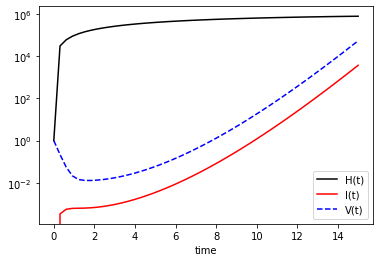

In [44]:
plt.plot(t,out[:,0],"k-", )
plt.plot(t,out[:,1],"r-")
plt.plot(t,out[:,2],"b--")
plt.xlabel("time")
plt.legend(["H(t)","I(t)","V(t)"])
plt.yscale('log')
plt.show()